In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('fortune500.csv')

In [3]:
df.head()


,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [4]:
df.tail()


,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [5]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit'] 

In [6]:
len(df)

25500

In [7]:
df.dtypes


year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [8]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
print(type(non_numberic_profits))
print(non_numberic_profits)
df.loc[non_numberic_profits].head() 



<class 'pandas.core.series.Series'>
0        False
1        False
2        False
3        False
4        False
         ...  
25495    False
25496    False
25497    False
25498    False
25499    False
Name: profit, Length: 25500, dtype: bool


,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [9]:
print(df.profit[non_numberic_profits])
print(set(df.profit[non_numberic_profits]))
len(df.profit[non_numberic_profits])

228      N.A.
290      N.A.
294      N.A.
296      N.A.
352      N.A.
         ... 
24242    N.A.
24296    N.A.
24435    N.A.
24489    N.A.
25485    N.A.
Name: profit, Length: 369, dtype: object
{'N.A.'}


369

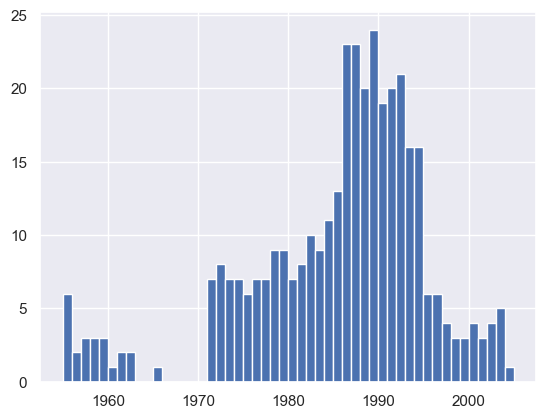

In [10]:
#vamos a ver la distribucion de las filas que tiene profits N.A 
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955,2006))
#del grafico que se desplega se podria decir que no es relevante la cantidad de valores N.A. en la columna "profit" por año.
# se puede decir que ni el pero año alcanza a 25 empresas que poseen en su columna profit N.A.

In [11]:
# Eliminaremos estas filas ya que para nuestro propositos particulares son irrelevantes.
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric) #se cambiara el tipo valor a la columna profit
print(len(df)) # comprobamos que se elimnaron las filas N.A.
df.dtypes

25131


year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [12]:
# Graficaremos la ganancia media por año
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

    


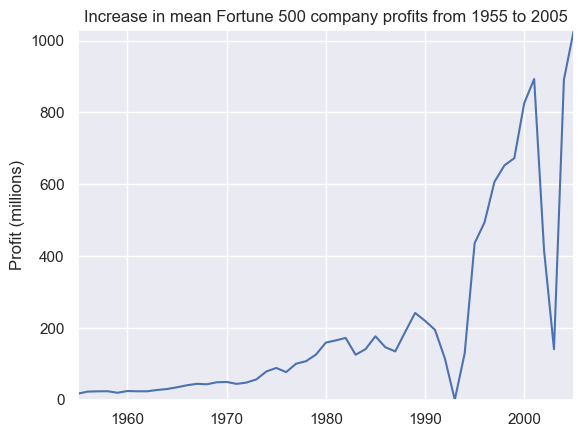

In [13]:
# Now let's plot!
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')


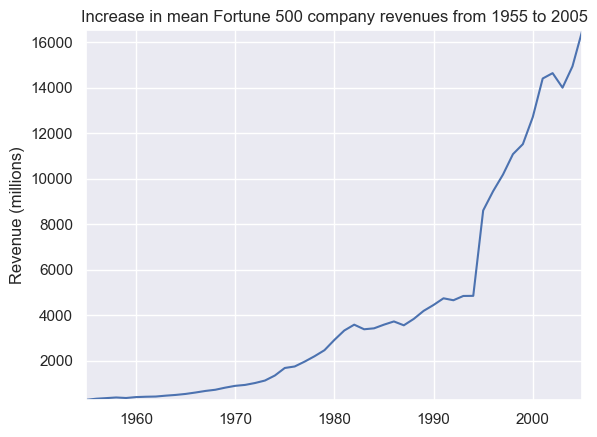

In [14]:
# Maybe the revenues can tell us more.
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

In [15]:
import ipywidgets as widgets
from IPython.display import display

def update_plot(year_range):
    start_year, end_year = year_range
    mask = (x >= start_year) & (x <= end_year)

    fig, ax = plt.subplots(figsize=(10, 6))
    plot(x[mask], y1[mask], ax, f'Increase in mean Fortune 500 company profits from {start_year} to {end_year}', 'Profit (millions)')
    plt.show()

year_range_slider = widgets.IntRangeSlider(
    value=[1955, 2005],
    min=1955,
    max=2005,
    step=1,
    description='Year range:',
    continuous_update=False
)

widgets.interact(update_plot, year_range=year_range_slider)

interactive(children=(IntRangeSlider(value=(1955, 2005), continuous_update=False, description='Year range:', m…

<function __main__.update_plot(year_range)>

In [20]:
!pip freeze 
!echo Hello fucking World!!
message = "hello alvarenga"
!echo $message

anyio==4.8.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==3.0.0
async-lru==2.0.4
attrs==25.1.0
autopep8==2.3.2
babel==2.17.0
beautifulsoup4==4.13.3
bleach==6.2.0
certifi==2025.1.31
cffi==1.17.1
charset-normalizer==3.4.1
colorama==0.4.6
comm==0.2.2
contourpy==1.3.1
cycler==0.12.1
debugpy==1.8.12
decorator==5.1.1
defusedxml==0.7.1
executing==2.2.0
Faker==35.0.0
fastjsonschema==2.21.1
fonttools==4.55.8
fqdn==1.5.1
h11==0.14.0
httpcore==1.0.7
httpx==0.28.1
idna==3.10
imageio==2.37.0
ipykernel==6.29.5
ipympl==0.9.6
ipython==8.32.0
ipywidgets==8.1.5
isoduration==20.11.0
jedi==0.19.2
Jinja2==3.1.5
joblib==1.4.2
json5==0.10.0
jsonpointer==3.0.0
jsonschema==4.23.0
jsonschema-specifications==2024.10.1
jupyter==1.1.1
jupyter-console==6.6.3
jupyter-events==0.12.0
jupyter-lsp==2.2.5
jupyter_client==8.6.3
jupyter_core==5.7.2
jupyter_server==2.15.0
jupyter_server_terminals==0.5.3
jupyterlab==4.3.5
jupyterlab_pygments==0.3.0
jupyterlab_server==2.27.3
jupyterlab_widgets==3.0